<h1 style="font-size:42px; text-align:center; margin-bottom:30px;"><span style="color:SteelBlue">Module 4:</span> Cluster Analysis</h1>
<hr>


At last, it's time to build our clustering models!


For clustering problems, the chosen input features are usually more important than which algorithm you use.
* In this module, we'll apply the K-Means algorithm to 3 different feature sets.
* There are no clear, widely-accepted performance metrics for clusters because there're no "ground truth" labels.
* Even so, we can compare the different clusters created from the 3 different feature sets.

<br><hr id="toc">

### In this module, we will cover...

1. K-Means
2. Base feature
3. Threshold features
4. PCA features
5. Model comparison



### First, let's import libraries and load the datasets.

First, import libraries that you'll need.

In [1]:
%matplotlib inline 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [2]:
# Import analytical base table
base_df = pd.read_csv('analytical_base.csv', index_col=0)

# Import thresholded item features
threshold_item_data = pd.read_csv('threshold_item_data.csv', index_col=0)

# Import PCA item features
pca_item_data = pd.read_csv('pca_item_data.csv', index_col=0)

In [3]:
print(base_df.shape)
print(threshold_item_data.shape)
print(pca_item_data.shape)


(414, 8)
(414, 20)
(414, 125)


# 1. K-Means

For clustering, which algorithm you choose is typically less important than the **input features** that you feed into it. 

<span id="k-means"></span>
# 1. K-Means

For clustering, which algorithm you choose is typically less important than the **input features** that you feed into it. 

<br>
**We already have a <code style="color:steelblue">base_df</code>.** 

**Create a <code style="color:steelblue">threshold_df</code> by joining it with <code style="color:steelblue">threshold_item_data</code>.**
* Then, display the first 5 rows of the new dataframe.

Q1: We already have a base_df. 
Create a threshold_df by joining it with threshold_item_data.
Then, display the first 5 rows of the new dataframe.

In [ ]:
# Your answer here:



In [36]:
# %load solution/m4q1.py


In [6]:
threshold_df.head()

,total_transcation,total_product,total_unique_product,total_sales,avg_product_value,avg_cart_value,min_cart_value,max_cart_value,22961,22630,...,21212,22551,22629,22328,21731,22556,22554,22423,22326,POST
CustomerID,,,,,,,,,,,,,,,,,,,,,
12347,7,182,103,4310.00,23.681319,615.714286,224.82,1294.32,0,0,...,0,0,0,0,5,0,0,4,0,0
12348,4,31,22,1797.24,57.975484,449.310000,227.44,892.80,0,0,...,0,0,0,0,0,0,0,0,0,4
12349,1,73,73,1757.55,24.076027,1757.550000,1757.55,1757.55,0,0,...,0,0,0,0,0,1,1,1,1,1
12350,1,17,17,334.40,19.670588,334.400000,334.40,334.40,0,0,...,0,1,0,0,0,0,0,0,0,1
12352,8,85,59,2506.04,29.482824,313.255000,120.33,840.30,0,1,...,0,0,0,0,1,0,0,2,0,5


In [7]:
pca_df = base_df.join(pca_item_data)

Q2: We already have a base_df. 
Create a pca_df by joining base_df with pca_item_data.
Then, display the first 5 rows of the new dataframe.

In [ ]:
# Your answer here:



In [37]:
# %load solution/m4q2.py

In [8]:
pca_df.head()

,total_transcation,total_product,total_unique_product,total_sales,avg_product_value,avg_cart_value,min_cart_value,max_cart_value,PC1,PC2,...,PC116,PC117,PC118,PC119,PC120,PC121,PC122,PC123,PC124,PC125
CustomerID,,,,,,,,,,,,,,,,,,,,,
12347,7,182,103,4310.00,23.681319,615.714286,224.82,1294.32,5.876139,4.828897,...,0.673156,0.392631,-0.317756,0.470647,-0.394702,-0.471497,-0.198882,-0.801738,0.156484,0.471712
12348,4,31,22,1797.24,57.975484,449.310000,227.44,892.80,-4.219846,1.226237,...,-0.118316,-1.032854,0.962994,-1.629979,0.743837,1.857946,0.098048,0.020816,-0.136735,0.941108
12349,1,73,73,1757.55,24.076027,1757.550000,1757.55,1757.55,-1.260855,2.387718,...,4.283059,2.015931,-3.273682,-1.512987,-0.651950,-6.855076,0.485219,1.125110,2.392421,-1.476412
12350,1,17,17,334.40,19.670588,334.400000,334.40,334.40,-4.929322,-0.714840,...,-1.087437,-0.013746,-1.407764,-0.488357,0.835466,-0.261455,-0.628040,0.116134,-1.138599,0.002057
12352,8,85,59,2506.04,29.482824,313.255000,120.33,840.30,-2.053122,2.110746,...,1.407932,-7.286822,1.590456,13.908656,1.050341,3.710750,3.241232,-4.918702,-0.889066,-8.264000


In [6]:
# using k-mean clustering 
from sklearn.cluster import KMeans

# 2. Base DF

The first set of features we'll consider is **"Base DF"**. 
* This only includes the purchase pattern features from our analytical base table.


In [7]:
base_df.head()

,total_transcation,total_product,total_unique_product,total_sales,avg_product_value,avg_cart_value,min_cart_value,max_cart_value
CustomerID,,,,,,,,
12347,7,182,103,4310.00,23.681319,615.714286,224.82,1294.32
12348,4,31,22,1797.24,57.975484,449.310000,227.44,892.80
12349,1,73,73,1757.55,24.076027,1757.550000,1757.55,1757.55
12350,1,17,17,334.40,19.670588,334.400000,334.40,334.40
12352,8,85,59,2506.04,29.482824,313.255000,120.33,840.30


Let's initialize a model pipeline for K-Means.

Note that we can control the number of clusters using n_clusters=3. This is the hyperparameter k 

We also set random_state=123 for replicable results. 

In [23]:
k_means = make_pipeline(StandardScaler(), KMeans(n_clusters=3, random_state=123))

In [24]:
k_means.fit(base_df)

Pipeline(memory=None,
     steps=[('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('kmeans', KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=123, tol=0.0001, verbose=0))])

In [25]:
base_df['cluster'] = k_means.predict(base_df)

In [11]:
base_df.head()

,total_transcation,total_product,total_unique_product,total_sales,avg_product_value,avg_cart_value,min_cart_value,max_cart_value,cluster
CustomerID,,,,,,,,,
12347,7,182,103,4310.00,23.681319,615.714286,224.82,1294.32,1
12348,4,31,22,1797.24,57.975484,449.310000,227.44,892.80,0
12349,1,73,73,1757.55,24.076027,1757.550000,1757.55,1757.55,0
12350,1,17,17,334.40,19.670588,334.400000,334.40,334.40,0
12352,8,85,59,2506.04,29.482824,313.255000,120.33,840.30,0


In [16]:
base_df[['total_sales','avg_cart_value','cluster']].sample(5)

,total_sales,avg_cart_value,cluster
CustomerID,,,
12461,826.88,413.440000,0
12510,982.57,491.285000,0
12519,340.84,340.840000,0
12428,7956.46,884.051111,1
12446,1002.31,1002.310000,0


To visualize these clusters, we can plot a scatterplot and color the points by cluster.

Since it's impossible to visualize all of the features, we'll just pick 2.

We use the hue= argument to color by cluster.

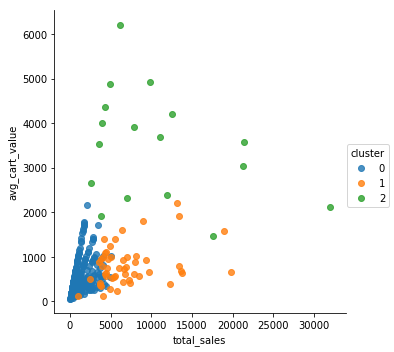

In [14]:
sns.lmplot(x='total_sales', y='avg_cart_value', hue='cluster', data=base_df, fit_reg=False)

# Threshold DF

The second set of features we'll consider is **"Threshold DF"**. 
* This includes the purchase pattern features from our analytical base table.
* This also includes the purchase counts for the 20 most popular items.


Q3: Initialize a new model pipeline for K-Means. Set it to create 3 clusters. Also set random_state=123 for replicable results. 

In [ ]:
# Your answer here:



In [38]:
# %load solution/m4q3.py

In [19]:
threshold_df.head()

,total_transcation,total_product,total_unique_product,total_sales,avg_product_value,avg_cart_value,min_cart_value,max_cart_value,22961,22630,...,22551,22629,22328,21731,22556,22554,22423,22326,POST,cluster
CustomerID,,,,,,,,,,,,,,,,,,,,,
12347,7,182,103,4310.00,23.681319,615.714286,224.82,1294.32,0,0,...,0,0,0,5,0,0,4,0,0,0
12348,4,31,22,1797.24,57.975484,449.310000,227.44,892.80,0,0,...,0,0,0,0,0,0,0,0,4,2
12349,1,73,73,1757.55,24.076027,1757.550000,1757.55,1757.55,0,0,...,0,0,0,0,1,1,1,1,1,2
12350,1,17,17,334.40,19.670588,334.400000,334.40,334.40,0,0,...,1,0,0,0,0,0,0,0,1,2
12352,8,85,59,2506.04,29.482824,313.255000,120.33,840.30,0,1,...,0,0,0,1,0,0,2,0,5,2


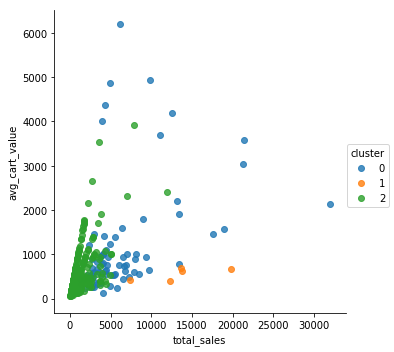

In [20]:
sns.lmplot(x='total_sales', y='avg_cart_value', hue='cluster', data=threshold_df, fit_reg=False)

# PCA DF

The last set of features we'll consider is **"PCA DF"**. 
* This includes the purchase pattern features from our analytical base table.
* This also includes the first 125 principal component features from the item data.

We'll repeat the same steps as above.

Q4: Initialize a new model pipeline for K-Means. Set it to create 3 clusters. Also set random_state=123 for replicable results. 

In [ ]:
# Your answer here:



In [39]:
# %load solution/m4q4.py

In [24]:
pca_df.head()

,total_transcation,total_product,total_unique_product,total_sales,avg_product_value,avg_cart_value,min_cart_value,max_cart_value,PC1,PC2,...,PC117,PC118,PC119,PC120,PC121,PC122,PC123,PC124,PC125,cluster
CustomerID,,,,,,,,,,,,,,,,,,,,,
12347,7,182,103,4310.00,23.681319,615.714286,224.82,1294.32,5.876139,4.828897,...,0.392631,-0.317756,0.470647,-0.394702,-0.471497,-0.198882,-0.801738,0.156484,0.471712,0
12348,4,31,22,1797.24,57.975484,449.310000,227.44,892.80,-4.219846,1.226237,...,-1.032854,0.962994,-1.629979,0.743837,1.857946,0.098048,0.020816,-0.136735,0.941108,2
12349,1,73,73,1757.55,24.076027,1757.550000,1757.55,1757.55,-1.260855,2.387718,...,2.015931,-3.273682,-1.512987,-0.651950,-6.855076,0.485219,1.125110,2.392421,-1.476412,2
12350,1,17,17,334.40,19.670588,334.400000,334.40,334.40,-4.929322,-0.714840,...,-0.013746,-1.407764,-0.488357,0.835466,-0.261455,-0.628040,0.116134,-1.138599,0.002057,2
12352,8,85,59,2506.04,29.482824,313.255000,120.33,840.30,-2.053122,2.110746,...,-7.286822,1.590456,13.908656,1.050341,3.710750,3.241232,-4.918702,-0.889066,-8.264000,2


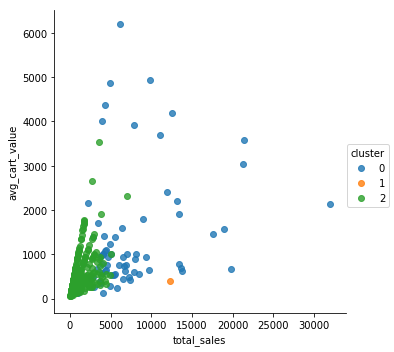

In [25]:
sns.lmplot(x='total_sales', y='avg_cart_value', hue='cluster', data=pca_df, fit_reg=False)

# Model comparison

Each of those 3 dataframes have the same indices:

In [30]:
print( all( base_df.index == threshold_df.index ) )
print( all( base_df.index == pca_df.index) )

True
True


In [32]:
from sklearn.metrics import adjusted_rand_score

In [33]:
adjusted_rand_score(base_df.cluster, threshold_df.cluster)

0.7512254397738608

In [34]:
adjusted_rand_score(threshold_df.cluster, base_df.cluster)

0.7512254397738608

In [35]:
adjusted_rand_score(base_df.cluster, pca_df.cluster)

0.8977446011520678

Finally, display the adjusted Rand index between base_df.cluster and pca_df.cluster.

Is it higher or lower than the one between base_df.cluster and threshold_df.cluster?

Which clusters are more like the ones created from the the base dataframe?

## Summary of Module 4

Congratulations!

As a reminder, here are a few things you did in this module:
* You brought together all of the customer-level features you've created in this project.
* You learned the inuitition behind the K-Means algorithm.
* You applied the K-Means algorithm to 3 different feature sets.
* And you compared the consensus (or lack thereof) of the clusters created.
